In [490]:
from keras.datasets import mnist  # handwritten digits
(x_train, labels_train), (x_test, labels_test) = mnist.load_data()  # splitting, training images, training image labels ...

In [491]:
# value normalisation; format the data, convert to floating-point numbers in the range [0, 1]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [492]:
# categorical labels in the form of integers 0-9
# one hot encoding, to define the output that the network should produce in response to each sample
from keras.utils import to_categorical
y_train = to_categorical(labels_train, 10)
y_test = to_categorical(labels_test, 10)

In [493]:
# data used as input to a convolutional layer
# the first dimension corresponds to the number of exemplars
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [494]:
# to build a simple CNN using convolutional, maxpooling, as well as dense layers (and with batch normalisation and dropout for some layers)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation, ZeroPadding2D, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
# from keras.optimizers import Adam
net = Sequential()
net.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
BatchNormalization(axis=-1)
net.add(Conv2D(32, (3, 3), activation='relu'))
net.add(MaxPooling2D(pool_size=(2,2)))
BatchNormalization(axis=-1)
net.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
BatchNormalization(axis=-1)
net.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
net.add(MaxPooling2D(pool_size=(2,2)))
net.add(Flatten())
BatchNormalization()
net.add(Dense(256, activation='relu'))
BatchNormalization()
net.add(Dropout(0.5))
net.add(Dense(10, activation='softmax'))

In [495]:
# loss function, optimizer helps determine how quickly the network learns
net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# history = net.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=256)

In [496]:
# ImageDataGenerator class generates batches of tensor image data with real-time data augmentation
train_gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)
test_gen = ImageDataGenerator()

In [497]:
# Takes data & label arrays, generates batches of augmented data
train_generator = train_gen.flow(x_train, y_train, batch_size=64)
test_generator = test_gen.flow(x_test, y_test, batch_size=64)

In [498]:
# steps_per_epoch: after having run for steps_per_epoch gradient descent steps, the fitting process will go to the next epoch
# validation_steps: tells the process how many batches to draw from the validation generator for evaluation
net.fit(train_generator, steps_per_epoch=60000//64, epochs=15, 
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/15
937/937 [==============================] - 97s 103ms/step - loss: 0.5628 - accuracy: 0.8113 - val_loss: 0.0376 - val_accuracy: 0.9881
Epoch 2/15
937/937 [==============================] - 85s 91ms/step - loss: 0.0869 - accuracy: 0.9722 - val_loss: 0.0311 - val_accuracy: 0.9896
Epoch 3/15
937/937 [==============================] - 99s 106ms/step - loss: 0.0622 - accuracy: 0.9808 - val_loss: 0.0201 - val_accuracy: 0.9933
Epoch 4/15
937/937 [==============================] - 91s 97ms/step - loss: 0.0541 - accuracy: 0.9833 - val_loss: 0.0208 - val_accuracy: 0.9935
Epoch 5/15
937/937 [==============================] - 90s 96ms/step - loss: 0.0485 - accuracy: 0.9858 - val_loss: 0.0209 - val_accuracy: 0.9934
Epoch 6/15
937/937 [==============================] - 89s 95ms/step - loss: 0.0421 - accuracy: 0.9870 - val_loss: 0.0171 - val_accuracy: 0.9944
Epoch 7/15
937/937 [==============================] - 90s 96ms/step - loss: 0.0388 - accuracy: 0.9878 - val_loss: 0.0180 - val_accurac

In [499]:
net.save("cnn_network_for_mnist.h5")

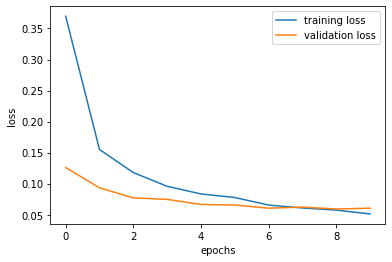

In [500]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [501]:
# testing a neural network
outputs = net.predict(x_test)  # predict testing images in mnist
labels_predicted = np.argmax(outputs, axis=1)  # argmax returns indices of maximum outputs
misclassified = sum(labels_predicted != labels_test)  # count the number of misclassified labels
print("percentage of misclassfied: ", 100*misclassified/labels_test.size)

percentage of misclassfied:  0.4
